In [1]:
import matplotlib.pyplot as plt

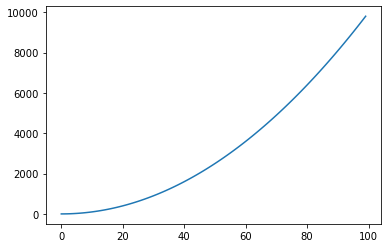

In [3]:
X = range(100)
Y = [value**2 for value in X]
plt.plot(X, Y)
plt.show()


# Data quality Problems
* 데이터의 최대/최소가 다름 -> Sacle에 따른 y값에 영향
* Ordinary 또는 Nominal 한 값 들의 표현은 어떻게?
* 잘 못 기입된 값들에 대한 처리
* 값이 없을 경우는 어떻게?
* 극단적으로 큰 값 또는 작은 값들은 그대로 놔둬야 하는가?

# Data preprocessing issues
* 데이터가 빠진 경우 (결측치의 처리)
* 라벨링된 데이터(category) 데이터의 처리
* 데이터의 scale의 차이가 매우 크게 날 경우

# 데이터가 없을 때 할 수 있는 전략
* 데이터가 없으면 sample을 drop
* 데이터가 없는 최소 개수를 정해서 sample을 drop
* 데이터가 거의 없는 feature는 feature 자체를 drop
* 최빈값, 평균값으로 비어있는 데이터를 채우기

In [5]:
import numpy as np
import pandas as pd

In [6]:
raw_data = {
    'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
    'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
    'age': [42, np.nan, 36, 24, 73],
    'sex': ['m', np.nan, 'f', 'm', 'f'],
    'preTestScore': [4, np.nan, np.nan, 2, 3],
    'postTestScore': [24, np.nan, np.nan, 62, 70],
}
df = pd.DataFrame(raw_data, columns = 
                  ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore']
                 )

In [7]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,24.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [9]:
df.isnull().sum() / len(df)

first_name       0.2
last_name        0.2
age              0.2
sex              0.2
preTestScore     0.4
postTestScore    0.4
dtype: float64

In [11]:
# null이 존재하는 데이터는 삭제
df_no_missing = df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,24.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [12]:
# 모든 데이터가 비어 있으면 drop
df_allNull = df.dropna(how='all')
df_allNull

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,24.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [13]:
df['location'] = np.nan
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,24.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [14]:
df.dropna(axis=1, how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,24.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [15]:
# 데이터 중에 null 값이 3개 보다 많으면 삭제
df.dropna(axis=1, thresh=3)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,24.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [16]:
# null 값에 원하는 값을 집어 넣는다.
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,24.0,0.0
1,0,0,0.0,0,0.0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0,0.0
4,Amy,Cooze,73.0,f,3.0,70.0,0.0


# 데이터 값 채우기
* 평균값, 중위값, 최빈값을 활용
* 그래프를 활용하고, 어떤 값을 이용할지 결정

In [17]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,24.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [19]:
# 평균값 집어넣기
df['preTestScore'].fillna(df['preTestScore'].mean(), inplace=True)

In [21]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,24.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [24]:
# 상관관계를 파악하고, 그룹을 지어 평균값을 대입
df.groupby('sex')['postTestScore'].mean()

sex
f    70.0
m    43.0
Name: postTestScore, dtype: float64

In [26]:
df['postTestScore'].fillna(
    df.groupby('sex')['postTestScore'].transform('mean'), inplace=True
)
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,24.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [27]:
# & 도 된다.
df[df['sex'].notnull() | df['location'].notnull()]

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,24.0,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [28]:
edges = pd.DataFrame({
    'source': [0, 1, 2],
    'target': [2, 2, 3],
    'weight': [3, 4, 5],
    'color': ['red', 'blue', 'blue'],
})
edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [32]:
edges.dtypes

source     int64
target     int64
weight     int64
color     object
dtype: object

In [33]:
edges['color']

0     red
1    blue
2    blue
Name: color, dtype: object

In [34]:
# get_dummies 명령어를 사용하면, type이 object인 컬럼을 이산데이터로 처리해준다.
pd.get_dummies(edges)

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [37]:
# 데이터가 너무 커서 이산데이터 처리가 많이 필요한 경우 원하는 컬럼만 처리한 뒤
# merge 시키는 방법이 있다.
colors = pd.get_dummies(edges['color'])

In [49]:
# index 기준으로 merge 하기!!!
add_colors = pd.merge(edges, colors, how='outer', left_index=True, right_index=True)
add_colors.drop('color', axis=1)

,source,target,weight,blue,red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [48]:
# Ordinary data -> One Hot Encoding


,source,target,weight,blue,red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [51]:
weight_dict = {3:'M', 4:'L', 5:'XL'}
edges['weight_sign'] = edges['weight'].map(weight_dict)
edges

,source,target,weight,color,weight_sign
0,0,2,3,red,M
1,1,2,4,blue,L
2,2,3,5,blue,XL


In [57]:
weight_sign = pd.get_dummies(edges['weight_sign'])

In [58]:
# 이렇게 붙이는 방법도 있다
pd.concat([edges, weight_sign], axis=1)

,source,target,weight,color,weight_sign,L,M,XL
0,0,2,3,red,M,0,1,0
1,1,2,4,blue,L,1,0,0
2,2,3,5,blue,XL,0,0,1


In [62]:
edges

,source,target,weight,color_blue,color_red,weight_sign_L,weight_sign_M,weight_sign_XL
0,0,2,3,0,1,0,1,0
1,1,2,4,1,0,1,0,0
2,2,3,5,1,0,0,0,1


In [63]:
edges.as_matrix()

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [64]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [65]:
# 구간을 나눈다.
bins = [0, 25, 50, 75, 100]
group_names = ['Low', 'Okay', 'Good', 'Great']
categories = pd.cut(df['postTestScore'], bins, labels=group_names)
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): [Low < Okay < Good < Great]

In [66]:
df['categories'] = pd.cut(df['postTestScore'], bins, labels=group_names)

In [67]:
df

,regiment,company,name,preTestScore,postTestScore,categories
0,Nighthawks,1st,Miller,4,25,Low
1,Nighthawks,1st,Jacobson,24,94,Great
2,Nighthawks,2nd,Ali,31,57,Good
3,Nighthawks,2nd,Milner,2,62,Good
4,Dragoons,1st,Cooze,3,70,Good
5,Dragoons,1st,Jacon,4,25,Low
6,Dragoons,2nd,Ryaner,24,94,Great
7,Dragoons,2nd,Sone,31,57,Good
8,Scouts,1st,Sloan,2,62,Good
9,Scouts,1st,Piger,3,70,Good


# Feature scaling 전략
* Min-Max Normalization
 * 기존 변수에 범위를 새로운 최대-최소로 변경,
 일반적으로 0과 1 사이 값으로 변경함
 * 기존 변수에 범위를 정규 분포로 변환, 실제 Min-Max의 값을 모를 때 활용가능

In [68]:
df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [69]:
df['A'].min()

14.0

In [70]:
(df['A'] - df['A'].min()) / (df['A'].max() - df['A'].min())

0    0.000000
1    0.926219
2    0.935335
3    1.000000
4    0.938495
Name: A, dtype: float64

In [71]:
# min_max scaling
def feature_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == 'min-max':
            df[column_name] = (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())
        elif scaling_strategy == "z-score":
            df[column_name] = (df[column_name] - df[column_name].mean()) / df[column_name].std()
    return df

In [72]:
df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [73]:
feature_scaling(df, column=['A', 'B'])

,A,B,C
0,0.000000,0.000000,big
1,0.926219,0.363636,small
2,0.935335,0.628645,big
3,1.000000,0.961407,small
4,0.938495,1.000000,small


In [74]:
feature_scaling(df, scaling_strategy='z-score', column=['A', 'B'])

,A,B,C
0,-1.784641,-1.405250,big
1,0.390289,-0.540230,small
2,0.411695,0.090174,big
3,0.563541,0.881749,small
4,0.419116,0.973556,small


In [75]:
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

In [76]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [84]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
std_scaler

StandardScaler()

In [82]:
df_std = std_scaler.transform(df[['Alcohol', 'Malic acid']])

In [83]:
df_std

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,